# Practice notebook for univariate analysis using NHANES data

This notebook will give you the opportunity to perform some univariate analyses on your own using the NHANES.  These analyses are similar to what was done in the week 2 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

da = pd.read_csv("nhanes_2015_2016-Copy1.csv")

## Question 1

Relabel the marital status variable [DMDMARTL](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDMARTL) to have brief but informative character labels.  Then construct a frequency table of these values for all people, then for women only, and for men only.  Then construct these three frequency tables using only people whose age is between 30 and 40.

In [125]:
# insert your code here
da["DMDMARTLx"] = da.DMDMARTL.replace({1:"Married",2:"Widowed",3:"Divorced",4:"Separated",5:"Never married",
                                       6:"Living with partner",77:"Refused"})
all_people = da.DMDMARTLx.value_counts()
print("Frequency Table for all people")
print(all_people)
da["RIAGENDRx"] = da.RIAGENDR.replace({1:"Male",2:"Female"})
men_n_women = da.groupby("RIAGENDRx")["DMDMARTLx"].value_counts()
print("Frequency Table for men and women")
print("Proportions below - \n")
print(men_n_women/(men_n_women.sum()))
#by age
da["agegrpx"] = pd.cut(da.RIDAGEYR,[30,40])    #creating stratas
all_people = da.groupby("agegrpx")["DMDMARTLx"].value_counts()
men_n_women = da.groupby(["agegrpx","RIAGENDRx"])["DMDMARTLx"].value_counts()
print("Frequency Table for all people between ages 30 to 40")
print(all_people)
print("Proportions for men and women betweeen ages 30 to 40 below - \n")
men_n_women/(men_n_women.sum())

Frequency Table for all people
Married                2780
Never married          1004
Divorced                579
Living with partner     527
Widowed                 396
Separated               186
Refused                   2
Name: DMDMARTLx, dtype: int64
Frequency Table for men and women
Proportions below - 

RIAGENDRx  DMDMARTLx          
Female     Married                0.238034
           Never married          0.094995
           Divorced               0.063939
           Widowed                0.054074
           Living with partner    0.047863
           Separated              0.021556
           Refused                0.000183
Male       Married                0.269821
           Never married          0.088418
           Living with partner    0.048411
           Divorced               0.041834
           Widowed                0.018268
           Separated              0.012422
           Refused                0.000183
Name: DMDMARTLx, dtype: float64
Frequency Table for al

agegrpx   RIAGENDRx  DMDMARTLx          
(30, 40]  Female     Married                0.276824
                     Never married          0.104077
                     Living with partner    0.061159
                     Divorced               0.046137
                     Separated              0.018240
                     Widowed                0.002146
          Male       Married                0.276824
                     Never married          0.095494
                     Living with partner    0.077253
                     Divorced               0.025751
                     Separated              0.012876
                     Widowed                0.002146
                     Refused                0.001073
Name: DMDMARTLx, dtype: float64

__Q1a.__ Briefly comment on some of the differences that you observe between the distribution of marital status between women and men, for people of all ages.

__Q1b.__ Briefly comment on the differences that you observe between the distribution of marital status states for women between the overall population, and for women between the ages of 30 and 40.

__Q1c.__ Repeat part b for the men.

## Question 2

Restricting to the female population, stratify the subjects into age bands no wider than ten years, and construct the distribution of marital status within each age band.  Within each age band, present the distribution in terms of proportions that must sum to 1.

In [126]:
da["agegrpx"] = pd.cut(da.RIDAGEYR,[10,20,30,40,50,60,70,80])
X = da[da["RIAGENDRx"]=="Female"]  #restricting to females
women = da.groupby(["agegrpx",X["RIAGENDRx"]])["DMDMARTLx"].value_counts()
women/(women.sum())



agegrpx   RIAGENDRx  DMDMARTLx          
(10, 20]  Female     Never married          0.010526
                     Living with partner    0.002807
                     Married                0.000351
(20, 30]  Female     Never married          0.080351
                     Married                0.055088
                     Living with partner    0.037193
                     Divorced               0.003860
                     Separated              0.003860
(30, 40]  Female     Married                0.090526
                     Never married          0.034035
                     Living with partner    0.020000
                     Divorced               0.015088
                     Separated              0.005965
                     Widowed                0.000702
(40, 50]  Female     Married                0.101053
                     Divorced               0.024211
                     Never married          0.022105
                     Living with partner    0.012982
     

__Q2a.__ Comment on the trends that you see in this series of marginal distributions.

__Q2b.__ Repeat the construction for males.

In [127]:
Y = da[da["RIAGENDRx"]=="Male"] #restricting to males
men = da.groupby(["agegrpx",Y["RIAGENDRx"]])["DMDMARTLx"].value_counts()
men/(men.sum())


agegrpx   RIAGENDRx  DMDMARTLx          
(10, 20]  Male       Never married          0.013720
                     Living with partner    0.001143
                     Married                0.000381
(20, 30]  Male       Never married          0.086128
                     Married                0.039253
                     Living with partner    0.035061
                     Separated              0.002668
                     Divorced               0.000762
                     Widowed                0.000762
(30, 40]  Male       Married                0.098323
                     Never married          0.033918
                     Living with partner    0.027439
                     Divorced               0.009146
                     Separated              0.004573
                     Widowed                0.000762
                     Refused                0.000381
(40, 50]  Male       Married                0.107470
                     Never married          0.014863
     

__Q2c.__ Comment on any notable differences that you see when comparing these results for females and for males.

## Question 3

Construct a histogram of the distribution of heights using the BMXHT variable in the NHANES sample.

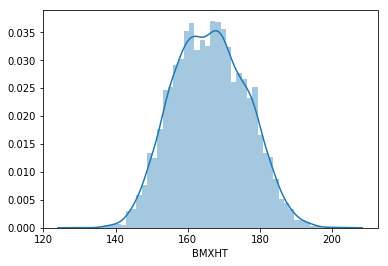

In [128]:
sns.distplot(da.BMXHT.dropna(),bins = 50)

__Q3a.__ Use the `bins` argument to [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) to produce histograms with different numbers of bins.  Assess whether the default value for this argument gives a meaningful result, and comment on what happens as the number of bins grows excessively large or excessively small. 

__Q3b.__ Make separate histograms for the heights of women and men, then make a side-by-side boxplot showing the heights of women and men.

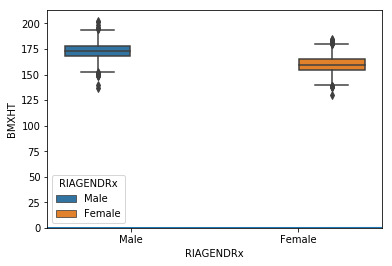

In [129]:
sns.distplot(da.groupby("RIAGENDR")["BMXHT"].value_counts())    #we didn't use RIAGENDRx AS IT HAS 1 AS MALE AND 2 AS FEMALE AND CHARACTER CANT BE PLOTTED ON X AXIS

sns.boxplot(x = "RIAGENDRx" ,y = "BMXHT",hue = "RIAGENDRx",data = da)


__Q3c.__ Comment on what features, if any are not represented clearly in the boxplots, and what features, if any, are easier to see in the boxplots than in the histograms.

## Question 4

Make a boxplot showing the distribution of within-subject differences between the first and second systolic blood pressure measurents ([BPXSY1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY1) and [BPXSY2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXSY2)).

In [ ]:
#can't understand the question

__Q4a.__ What proportion of the subjects have a lower SBP on the second reading compared to the first?

__Q4b.__ Make side-by-side boxplots of the two systolic blood pressure variables.

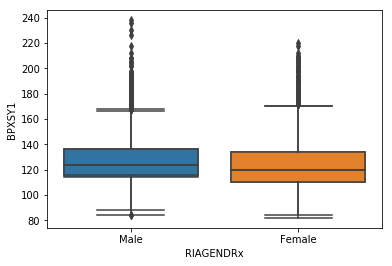

In [130]:
sns.boxplot(x = "RIAGENDRx",y = "BPXSY2",data = da)
sns.boxplot(x = "RIAGENDRx",y = "BPXSY1",data = da)

__Q4c.__ Comment on the variation within either the first or second systolic blood pressure measurements, and the variation in the within-subject differences between the first and second systolic blood pressure measurements.

## Question 5

Construct a frequency table of household sizes for people within each educational attainment category (the relevant variable is [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2)).  Convert the frequencies to proportions.

In [131]:
da.DMDEDUC2.value_counts()
x = da.DMDEDUC2.value_counts()
x/x.sum()


4.0    0.296127
5.0    0.249543
3.0    0.216661
1.0    0.119657
2.0    0.117464
9.0    0.000548
Name: DMDEDUC2, dtype: float64

__Q5a.__ Comment on any major differences among the distributions.

__Q5b.__ Restrict the sample to people between 30 and 40 years of age.  Then calculate the median household size for women and men within each level of educational attainment.

In [140]:
da["agegrpx"] = pd.cut(da.RIDAGEYR,[30,40])
x = da.groupby("agegrpx")["DMDEDUC2"].value_counts()
da["DMDEDUC2x"] = da.DMDEDUC2.replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
y = da.groupby(["agegrpx","RIAGENDRx"])["DMDEDUC2x"].value_counts()
y.median()

91.0

## Question 6

The participants can be clustered into "maked variance units" (MVU) based on every combination of the variables [SDMVSTRA](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVSTRA) and [SDMVPSU](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#SDMVPSU).  Calculate the mean age ([RIDAGEYR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDAGEYR)), height ([BMXHT](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXHT)), and BMI ([BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)) for each gender ([RIAGENDR](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIAGENDR)), within each MVU, and report the ratio between the largest and smallest mean (e.g. for height) across the MVUs.

In [147]:
# insert your code here
da.groupby("RIAGENDRx")["RIDAGEYR"].mean()
da.groupby("RIAGENDRx")["BMXHT"].mean()
da.groupby("RIAGENDRx")["BMXBMI"].mean()
#(these are not for MVU's)

RIAGENDRx
Female    29.939946
Male      28.778072
Name: BMXBMI, dtype: float64

__Q6a.__ Comment on the extent to which mean age, height, and BMI vary among the MVUs.

__Q6b.__ Calculate the inter-quartile range (IQR) for age, height, and BMI for each gender and each MVU.  Report the ratio between the largest and smalles IQR across the MVUs.

In [149]:
da.groupby("RIAGENDRx")["RIDAGEYR"].describe()    #do it similarly for other values(these are not for MVU's)

,count,mean,std,min,25%,50%,75%,max
RIAGENDRx,,,,,,,,
Female,2976.0,47.793011,18.299419,18.0,32.0,47.0,62.0,80.0
Male,2759.0,48.332004,18.571168,18.0,32.0,48.0,63.0,80.0


__Q6c.__ Comment on the extent to which the IQR for age, height, and BMI vary among the MVUs.